# CDS-301/501 - Scientific Information and Data Visualization

<img src="./images/div-0.png" alt="Drawing" align="left" style="width: 800px" />

# Python - Network Visualization and Kernel Density Estimation

<img src="./images/banner-0.png" alt="drawing" align="left" style="width: 400px" />

<img src="./images/div-0.png" alt="Drawing" align="left" style="width: 800px" />

# Plan/Objectives for Today

* **Networks / Python NetworkX and Visualization** 
* **Kernel Density Estimation**
* **Student Exercises**
* **Remaining time if any: Work in groups, ask questions, etc...**
* Note: No homework assignment over Spring Break

<img src="./images/div-0.png" alt="Drawing" align="left" style="width: 800px" />

In [1]:
import os
import sys
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import imageio
from skimage import img_as_float, exposure, measure
from skimage.transform import rescale
register_matplotlib_converters()

In [2]:
# check versions 
print('Python version:', sys.version)
print('NumPy version:', np.__version__)
print('Pandas version:', pd.__version__)
print('Matplotlib version:', matplotlib.__version__)
print('Seaborn version:', sns.__version__)
print('NetworkX version:', nx.__version__)

Python version: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
NumPy version: 1.18.1
Pandas version: 1.0.1
Matplotlib version: 3.1.3
Seaborn version: 0.10.0
NetworkX version: 2.4


<img src="./images/div-0.png" alt="Drawing" align="left" style="width: 800px" />

## Historical Network

### 7 Bridges of Konigsberg

<img src="./images/konigsberg-0.jpg" alt="Drawing" align="left" style="width: 450px" />

<img src="./images/div-0.png" alt="Drawing" align="left" style="width: 800px" />

## Real World Networks

* **Many real world systems can be modeled as a network**
    * Social networks
    * Transportation networks
    * Computer networks
    * Electric grid
    * Biological networks
    * Citation networks
    * WWW links
    * Communication networks
    * Many others...
    
    
* **Real world networks can be planned or can emerege from local constraints or rules**
    * Transportation networks (planned)
    * Social Networks (unplanned / emergent)
    
### Some Examples:

<img src="./images/social-0.png" alt="Drawing" align="left" style="width: 600px" />

<img src="./images/div-0.png" alt="Drawing" align="left" style="width: 800px" />

<img src="./images/metro-0.jpg" alt="Drawing" align="left" style="width: 600px" />

<img src="./images/div-0.png" alt="Drawing" align="left" style="width: 800px" />

## Networks/Graphs
* Network Terminology - Nodes and Links
* Graph Terminology - Vertices and Edges

Concepts are the same, terminology is different

<img src="./images/network-0.png" alt="Drawing" align="left" style="width: 800px" />

* **We model and analyze real world networks using Graph Theory**
    * A Graph $G = (V,E)$ a set of vertices $V$ and edges $E$
    * A vertex is an *thing* in the system and an edge is a *relationship* between two things
    * An edge $E=(u,v)$ where $u$ and $v$ are start and end vertices that $E$ links
    * In an *undirected* graph, edges have no direction, the relationship represented is symmetric between $u$ and $v$
    * In a *directed* graph, each edge has a direction, the relationship is asymmetric
    * Edges may be weighted indicating, for example, cost of moving from $u$ to $v$  
* **The Python NetworkX package is useful for constructing, analyzing and visualizing networks** 

<img src="./images/div-0.png" alt="Drawing" align="left" style="width: 800px" />

<img src="./images/simple-0.png" alt="Drawing" align="left" style="width: 200px" />

<img src="./images/div-0.png" alt="Drawing" align="left" style="width: 800px" />

In [3]:
# Create the Graph - undirected graph (use G = nx.DiGraph() to create a directed graph)
graph = nx.Graph()

In [4]:
# Create the Vertices/Nodes (vertices and edges can be any Python object, here I'm just using a string)
graph.add_node('A')
graph.add_node('B')
graph.add_node('C')

In [5]:
# Create the Edges/Links
graph.add_edge('A', 'B', weight=1.0)
graph.add_edge('A', 'C', weight=1.0)
graph.add_edge('B', 'C', weight=1.0)

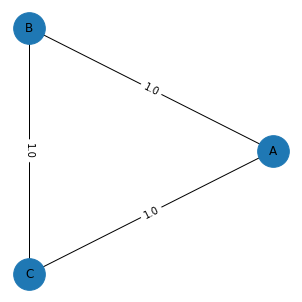

In [6]:
# Draw the Graph

# matplotlib - create a larger canvas
plt.rcParams['figure.figsize'] = (4,4)

# Specify a graph layout
pos = nx.circular_layout(graph)

# draw the graph
nx.draw(graph, pos=pos, node_size=1000)

# add the node labels
nx.draw_networkx_labels(graph,pos)

# add the edge labels
elabels = nx.get_edge_attributes(graph,'weight')
nx.draw_networkx_edge_labels(graph,pos,edge_labels=elabels)

# display
plt.show()

In [7]:
# Repeat using a directed graph 

# Repeat using a directed graph, for example purposes just assume A->B->C (circuit)
directed_graph = nx.DiGraph()

In [8]:
# Create the Vertices/Nodes 
directed_graph.add_node('A')
directed_graph.add_node('B')
directed_graph.add_node('C')

In [9]:
# Create the Edges/Links - A to B, B to C, C to A
directed_graph.add_edge('A', 'B', weight=1.0)
directed_graph.add_edge('B', 'C', weight=1.0)
directed_graph.add_edge('C', 'A', weight=1.0)

#### Note below the use of a layout algorithm 

These algorithms are responsible for positioning where in the visualization the nodes are place.  

You can review the available layouts in NetworkX here:
https://networkx.github.io/documentation/networkx-2.2/reference/drawing.html


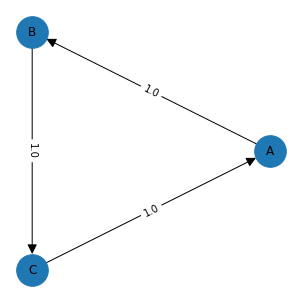

In [10]:
# Draw the Graph

# matplotlib - create a larger canvas
plt.rcParams['figure.figsize'] = (4,4)

# Specify a graph layout 
pos = nx.circular_layout(directed_graph)

# draw the graph
nx.draw(directed_graph, pos=pos, node_size=1000, arrowsize=20)

# add the labels
nx.draw_networkx_labels(directed_graph,pos)

# add the edge labels
elabels = nx.get_edge_attributes(directed_graph,'weight')
nx.draw_networkx_edge_labels(directed_graph,pos,edge_labels=elabels)

# display
plt.show()

<img src="./images/div-0.png" alt="Drawing" align="left" style="width: 800px" />

## Storing Attributes for Nodes and Edges

NetworkX allows you to store "attributes" (arbitrary objects) via keyword,value pair for both Nodes and Edges

In [11]:
# Storing attributes 

graph = nx.Graph()

# Create the Vertices/Nodes (vertices and edges can be any Python object, here I'm just using a string)
graph.add_node('A', name='Alice')
graph.add_node('B', name='Bodhi')
graph.add_node('C', name='Caris')

graph.add_edge('A', 'B', rel='Alice-Bodhi Relationship')
graph.add_edge('B', 'C', rel='Bodhi-Caris Relationship')
graph.add_edge('C', 'A', rel='Caris-Alice Relationship')

# Getting node attributes
names = nx.get_node_attributes(graph, 'name')
print(names)
print(names['A'])

# Getting edge attributes
rels = nx.get_edge_attributes(graph, 'rel')
print(rels)
print(rels[('B','C')])


{'A': 'Alice', 'B': 'Bodhi', 'C': 'Caris'}
Alice
{('A', 'B'): 'Alice-Bodhi Relationship', ('A', 'C'): 'Caris-Alice Relationship', ('B', 'C'): 'Bodhi-Caris Relationship'}
Bodhi-Caris Relationship


<img src="./images/div-0.png" alt="Drawing" align="left" style="width: 800px" />

## Degree of a node/vertex 
**Degree:** The degree of a node is equal to the number edges touching that node   
**Indegree/Outdegree:** For directed graphs indegree is the number of incoming edges, and outdegree is the number of outgoing edges

<img src="./images/degree-0.png" alt="drawing" align="left" style="width: 800px" />

Note that there are other graph types supported by NetworkX called MultiGraph and MultiDiGraph  
These graph types allow multiple edges to between the same node  
This can be useful when you are trying to capture more than one relationship in the same graph  
  
For the rest of this lecture we'll be just using undirected, unweighted graphs 

<img src="./images/div-0.png" alt="Drawing" align="left" style="width: 800px" />

## Network Topologies 
* **Some Basic Reference Networks**
    * Ring (Regular) (Regular means every node has the same degree)
    * Star
    * Mesh
    * Tree
    * Fully Connected (Complete) (Regular)  
* **Random Networks**
* **Small World Networks**
* **Scale Free Networks**
* **We can generate these using NetworkX functions**

<img src="./images/div-0.png" alt="Drawing" align="left" style="width: 800px" />

### Reference Networks

#### Ring 

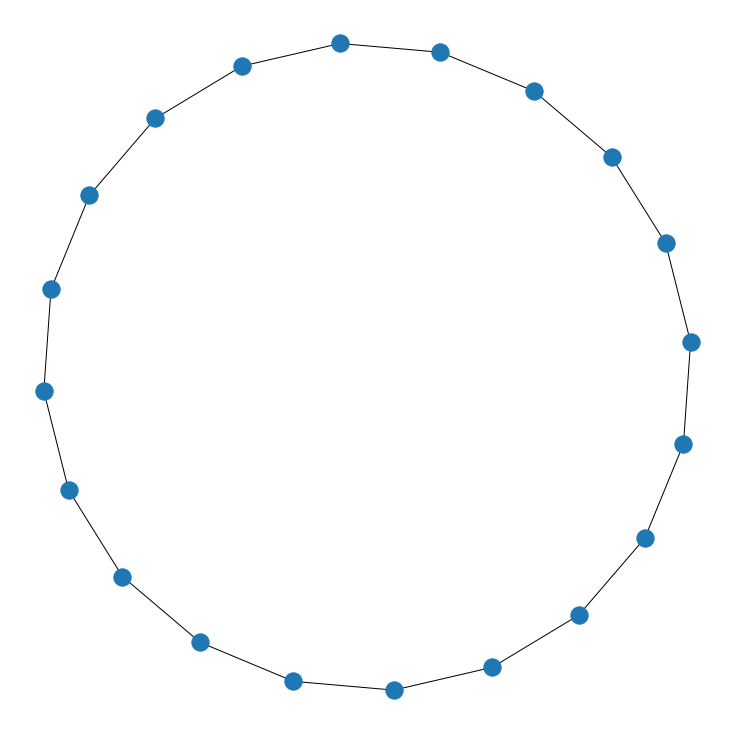

In [12]:
# matplotlib - create a larger canvas
plt.rcParams['figure.figsize'] = (10,10)

ring_graph = nx.ring_of_cliques(10,2)
pos=nx.spring_layout(ring_graph, iterations=1000)
nx.draw(ring_graph,pos)
plt.show()

<img src="./images/div-0.png" alt="Drawing" align="left" style="width: 800px" />

#### Star 

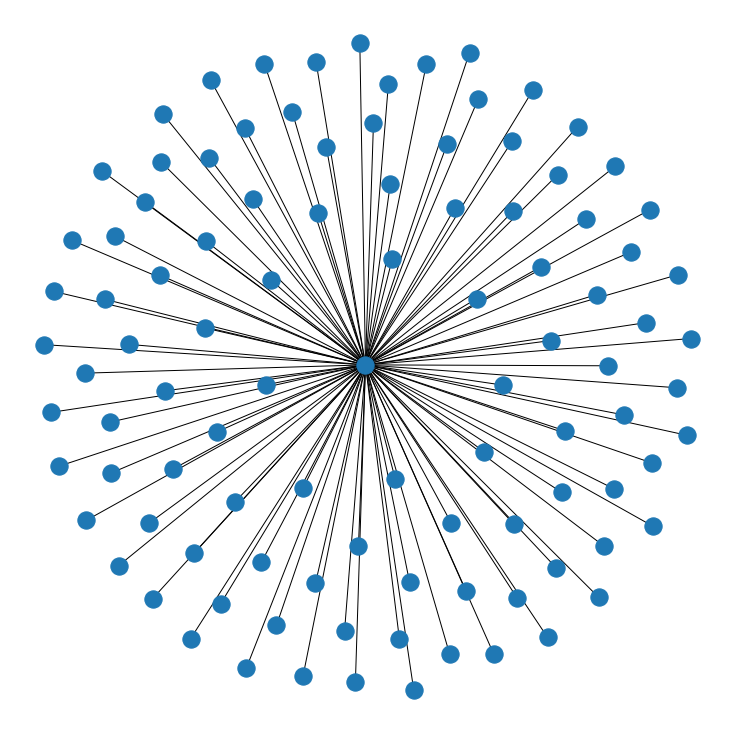

In [13]:
# matplotlib - create a larger canvas
plt.rcParams['figure.figsize'] = (10,10)

star_graph = nx.star_graph(100)
nx.draw(star_graph)
plt.show()

<img src="./images/div-0.png" alt="Drawing" align="left" style="width: 800px" />

#### Grid 

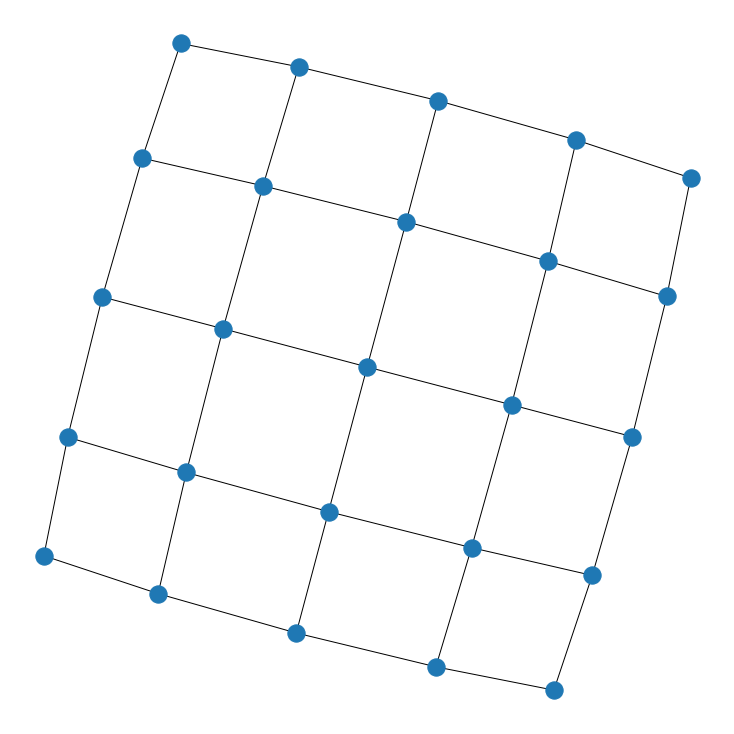

In [14]:
# matplotlib - create a larger canvas
plt.rcParams['figure.figsize'] = (10,10)

grid_graph = nx.grid_graph([5,5])
pos=nx.spring_layout(grid_graph, iterations=5000)
nx.draw(grid_graph, pos=pos)
plt.show()

<img src="./images/div-0.png" alt="Drawing" align="left" style="width: 800px" />

#### Complete Graph 

In [15]:
# Complete Graph
complete_graph = nx.complete_graph(20)

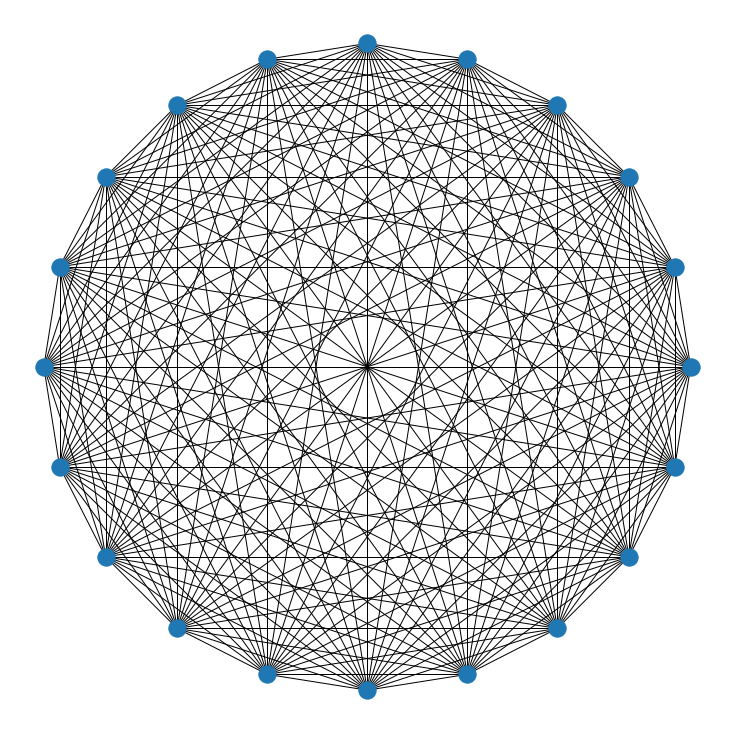

In [16]:
# Draw the Graph

# matplotlib - create a larger canvas
plt.rcParams['figure.figsize'] = (10,10)

# Specify a graph layout 
pos = nx.circular_layout(complete_graph)

# draw the graph
nx.draw(complete_graph, pos=pos)

# display
plt.show()

#### Balanced Tree 

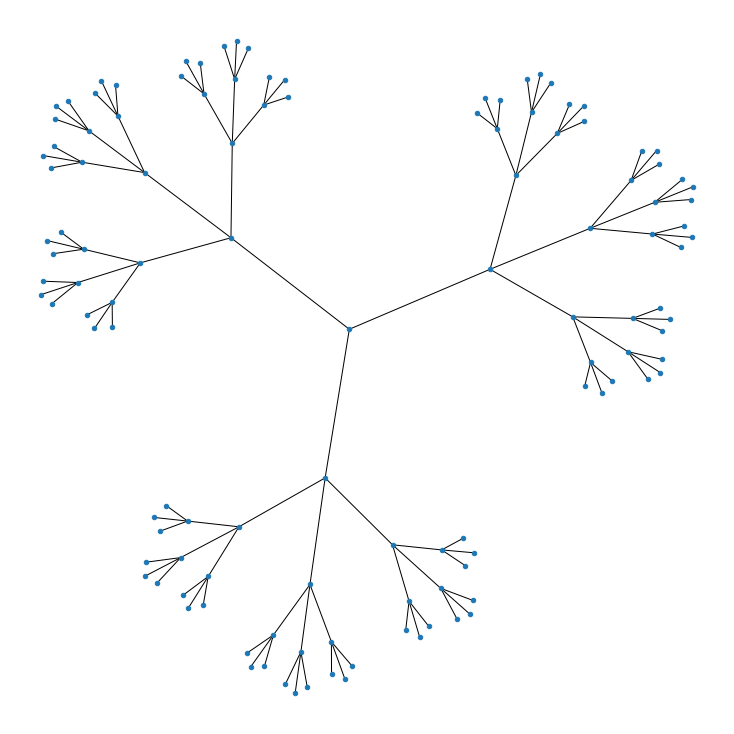

In [17]:
# balanced tree

# matplotlib - create a larger canvas
plt.rcParams['figure.figsize'] = (10,10)

# 3 children, 4 levels
tree_graph = nx.balanced_tree(3,4)
pos=nx.spring_layout(tree_graph,iterations=5000)
nx.draw(tree_graph,pos=pos,node_size=20)

### Random Network

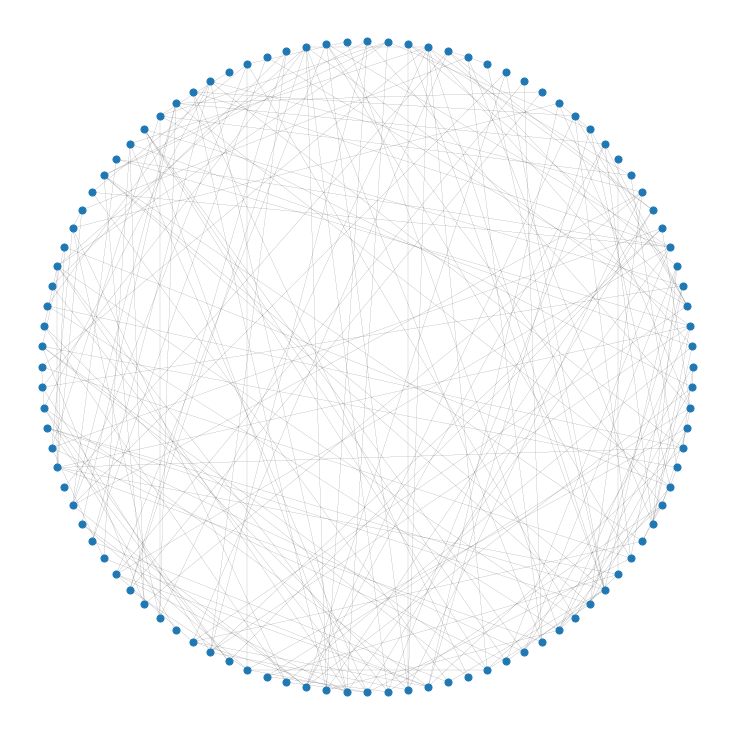

In [18]:
# random graph

# matplotlib - create a larger canvas
plt.rcParams['figure.figsize'] = (10,10)

# n is number of nodes 
# p is the probability of edge creation (for every other node in the network)
n = 100 
p = 0.05

random_graph = nx.gnp_random_graph(n,p)
pos=nx.circular_layout(random_graph)
nx.draw(random_graph,pos=pos,node_size=50,width=0.1)

In [19]:
# Note we can get the degree of each node 
list_of_tuples = random_graph.degree
print(list_of_tuples)

[(0, 3), (1, 4), (2, 6), (3, 6), (4, 4), (5, 4), (6, 7), (7, 4), (8, 4), (9, 5), (10, 3), (11, 1), (12, 5), (13, 5), (14, 4), (15, 4), (16, 2), (17, 2), (18, 3), (19, 2), (20, 5), (21, 5), (22, 9), (23, 4), (24, 5), (25, 4), (26, 2), (27, 5), (28, 8), (29, 3), (30, 2), (31, 5), (32, 1), (33, 6), (34, 4), (35, 6), (36, 6), (37, 5), (38, 5), (39, 3), (40, 6), (41, 3), (42, 3), (43, 5), (44, 3), (45, 7), (46, 2), (47, 3), (48, 3), (49, 5), (50, 3), (51, 3), (52, 5), (53, 4), (54, 5), (55, 7), (56, 1), (57, 6), (58, 3), (59, 3), (60, 3), (61, 6), (62, 4), (63, 4), (64, 4), (65, 1), (66, 6), (67, 6), (68, 3), (69, 6), (70, 3), (71, 4), (72, 6), (73, 5), (74, 7), (75, 6), (76, 5), (77, 6), (78, 7), (79, 3), (80, 2), (81, 6), (82, 4), (83, 4), (84, 4), (85, 7), (86, 3), (87, 6), (88, 9), (89, 4), (90, 5), (91, 4), (92, 5), (93, 5), (94, 6), (95, 3), (96, 6), (97, 3), (98, 6), (99, 4)]


In [20]:
# the first entry is the node id, second entry is the degree - we can strip out just degrees 
degs = [deg for node_id, deg in list_of_tuples ]
print(degs)

[3, 4, 6, 6, 4, 4, 7, 4, 4, 5, 3, 1, 5, 5, 4, 4, 2, 2, 3, 2, 5, 5, 9, 4, 5, 4, 2, 5, 8, 3, 2, 5, 1, 6, 4, 6, 6, 5, 5, 3, 6, 3, 3, 5, 3, 7, 2, 3, 3, 5, 3, 3, 5, 4, 5, 7, 1, 6, 3, 3, 3, 6, 4, 4, 4, 1, 6, 6, 3, 6, 3, 4, 6, 5, 7, 6, 5, 6, 7, 3, 2, 6, 4, 4, 4, 7, 3, 6, 9, 4, 5, 4, 5, 5, 6, 3, 6, 3, 6, 4]


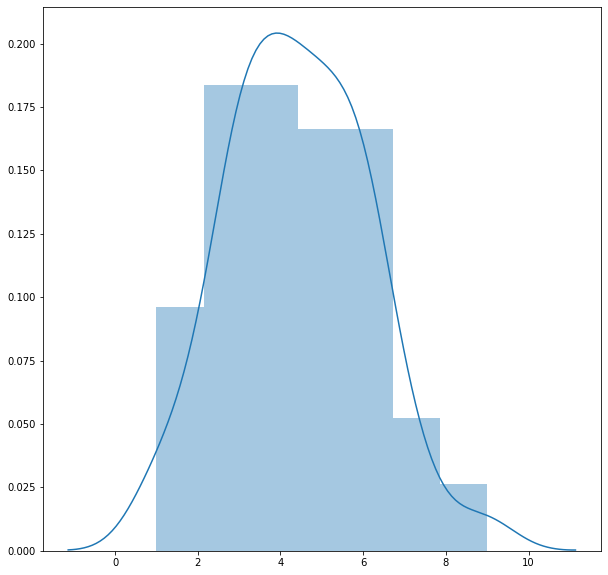

In [21]:
# lets do a quick plot the histogram of the degrees 
sns.distplot(degs)
plt.show()

In [22]:
# Define a function to plot the distribution for other graphs
def plot_graph_distribution(graph):
    # get the tuple of degrees [(node,deg)...]
    deg_list = graph.degree
    degs = [deg for nd, deg in deg_list]
    sns.distplot(degs)
    plt.show()

<img src="./images/div-0.png" alt="Drawing" align="left" style="width: 800px" />

### "Small World" Networks

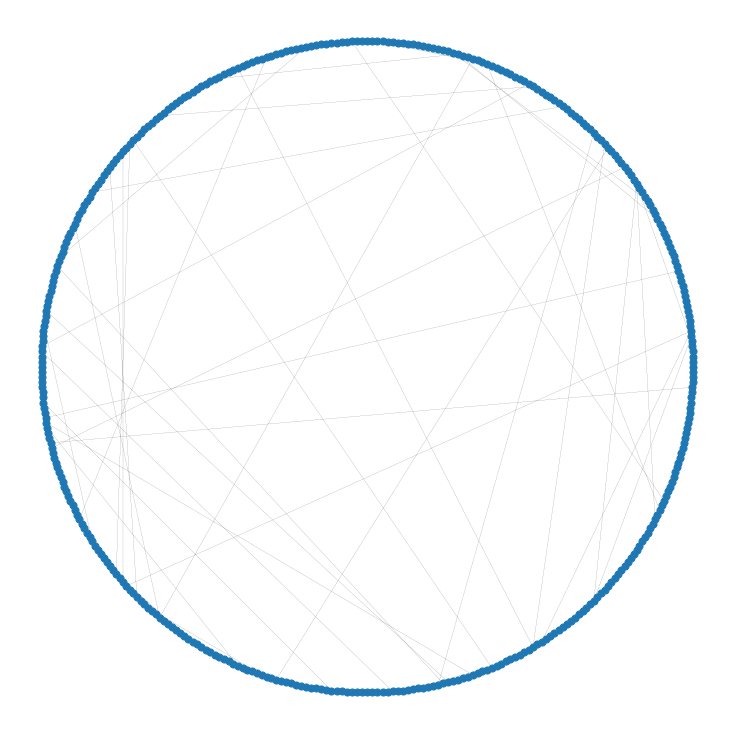

In [23]:
# watts-strogatz graph

# matplotlib - create a larger canvas
plt.rcParams['figure.figsize'] = (10,10)

# n is the number of nodes in the network
# k is the k nearest neighbors to attach to (k>=2, k=1 will fail)
# p is the probability an edge with get re-connected from a neighbor to a randomly selected 
n = 400 
k = 2 
p = 0.1

watts_strogatz_graph = nx.connected_watts_strogatz_graph(n,k,p)
pos=nx.circular_layout(watts_strogatz_graph)
nx.draw(watts_strogatz_graph,pos=pos,node_size=50,width=0.1)

<img src="./images/div-0.png" alt="Drawing" align="left" style="width: 800px" />

### Scale Free Networks

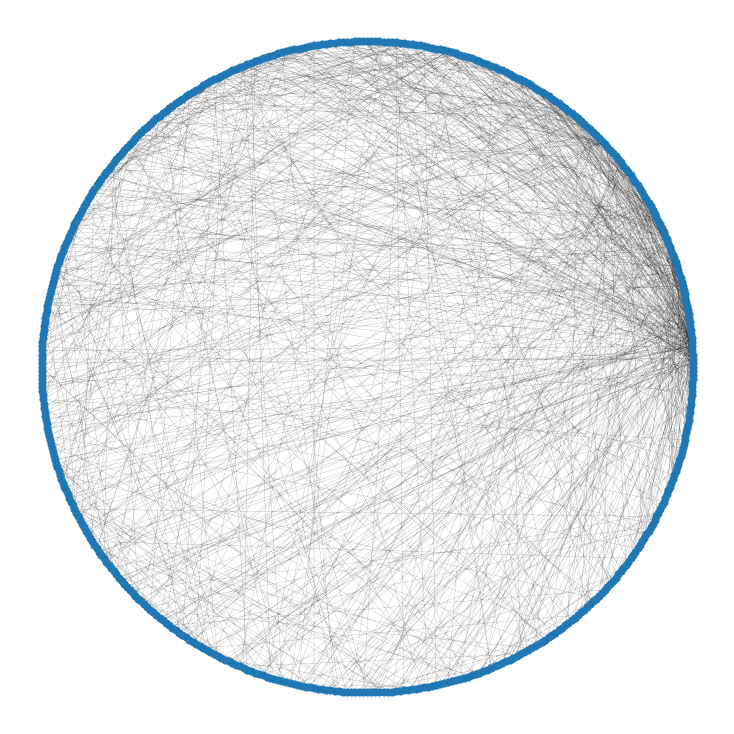

In [24]:
# barabasi-albert graph 

# matplotlib - create a larger canvas
plt.rcParams['figure.figsize'] = (10,10)

# n is the number of nodes in the network
# m is the number of edges generated for each node 
n = 500
m = 2

barabasi_graph = nx.barabasi_albert_graph(n,m)
pos=nx.circular_layout(barabasi_graph)
nx.draw(barabasi_graph,pos=pos,node_size=50,width=0.1)

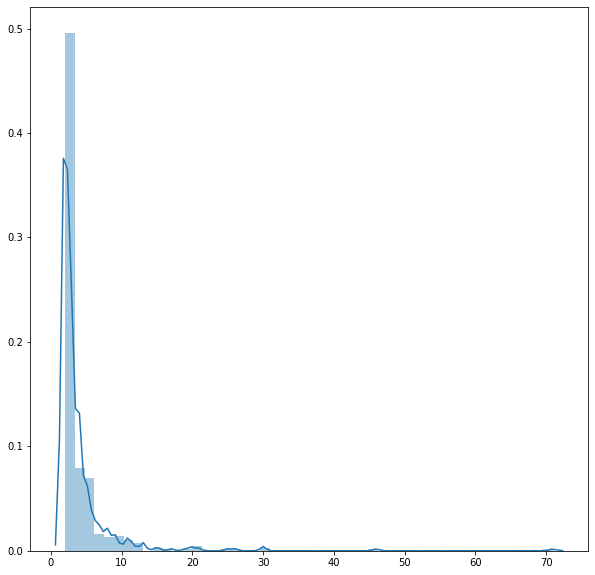

In [25]:
plot_graph_distribution(barabasi_graph)

<img src="./images/div-0.png" alt="Drawing" align="left" style="width: 800px" />

<img src="./images/scale-free-0.png" alt="Drawing" align="left" style="width: 600px" />

<img src="./images/div-0.png" alt="Drawing" align="left" style="width: 800px" />

## A Few More Definitions

* **Path Related Definitions**
    * Walk - A walk is a sequence of vertices from a particular start vertex to a particular final vertex
        * A walk contains the sequence of vertices plus the intermediate edges taken
        * A walk may contain duplicate vertices and edges
    * Trail - A trail is a walk where no edge is repeated
    * Path - A path is a walk where all vertices and edges are distinct (that is, no vertex or edge is visited twice)
    * Connected Graph - A graph is connected if there is a path between every pair of vertices

<img src="./images/exercise-0.png" alt="Drawing" align="left" style="width: 550px" />

<img src="./images/div-0.png" alt="Drawing" align="left" style="width: 800px" />

## Network Analysis 

### Node Centrality Measures
* **Degree Centrality** - Answers: How many nodes can this node directly reach?  Degree is the simpliest measure to compute and understand - it measures the local connectedness of a node. For a directed graph - Degree is separated into "in degree" and "out degree".  Degree centrality is measured as the fraction of all nodes a node is connected to.


* **Closeness Centrality** - Answers: How quickly can this node reach all other nodes in the network? Closeness is the reciprocal of the average shortest path length to the node from all other reachable nodes in the network. 


* **Betweenness Centrality** - Answers: How likely is this node to be on the most direct path between two nodes in the network? Betweenness centrality of a node v is the sum of the fraction of all-pairs shortest paths that pass through v.  


* **Eigenvector Centrality** - Answers: How important is this node based on the importance of the nodes it connects to?  So even if a node's degree centrality is low, if it links to important nodes, it's important.  The famous PageRank algorithm originally used by Google is of this type.  Take's its name from the way it's computed when the network is viewed as an adjacency matrix. 


<img src="./images/div-0.png" alt="Drawing" align="left" style="width: 800px" />

### Degree Centrality

<img src="./images/degree-centrality-0.png" alt="Drawing" align="left" style="width: 700px" />

<img src="./images/div-0.png" alt="Drawing" align="left" style="width: 800px" />

### Closeness Centrality

<img src="./images/closeness-centrality-0.png" alt="Drawing" align="left" style="width: 700px" />

<img src="./images/div-0.png" alt="Drawing" align="left" style="width: 800px" />

### Betweenness Centrality

<img src="./images/betweenness-centrality-0.png" alt="Drawing" align="left" style="width: 700px" />

<img src="./images/div-0.png" alt="Drawing" align="left" style="width: 800px" />

### Eigenvector Centrality

<img src="./images/eigenvector-centrality-0.png" alt="drawing" align="left" style="width: 500px" />

<img src="./images/div-0.png" alt="Drawing" align="left" style="width: 800px" />

## Network Visualization  

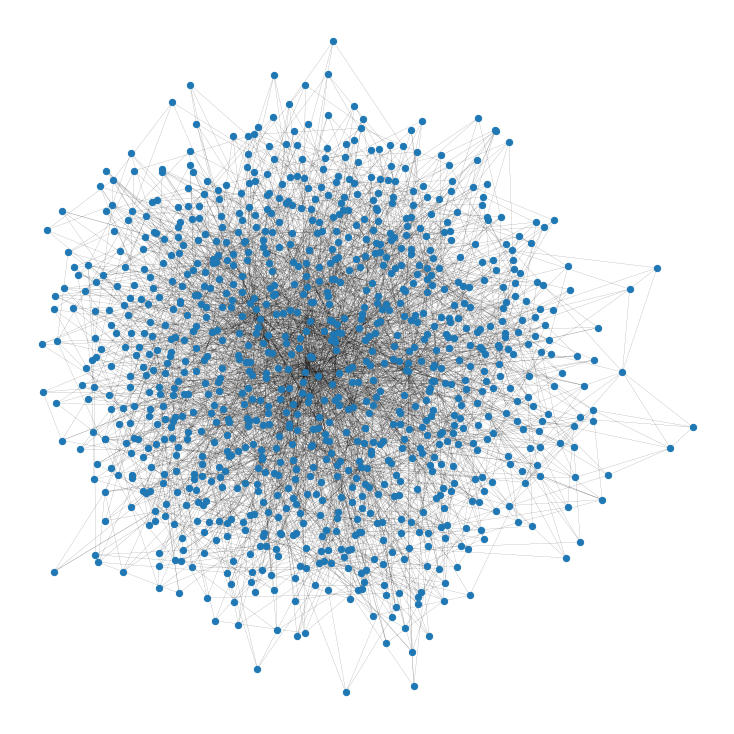

In [26]:
# Visualization options within networkx

# matplotlib - create a larger canvas
plt.rcParams['figure.figsize'] = (10,10)

# set VG to the graph object you want to visualize

VG = nx.powerlaw_cluster_graph(1000, 4, 0.5)

# Layout
pos = nx.spring_layout(VG, iterations=50)

# Node size 
ns = 40

# width of the edges
wd = 0.1

nx.draw(VG, pos=pos, node_size=ns, width=wd)
plt.show()

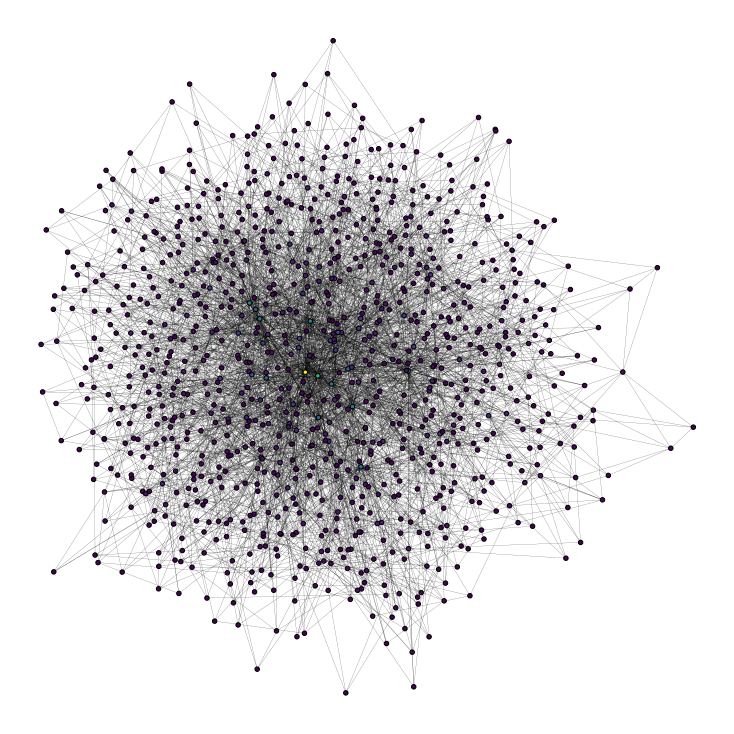

In [27]:
# size nodes based on centrality

# Warning: This cell may run for a while...

# matplotlib - create a larger canvas
plt.rcParams['figure.figsize'] = (10,10)

# use a centrality measure...
dc = nx.degree_centrality(VG)
#dc = nx.betweenness_centrality(VG)
#dc = nx.closeness_centrality(VG)
#dc = nx.eigenvector_centrality(VG, max_iter=1000)

ds = np.array(list(dc.values()))

# scaling by a constant and using the number of nodes in the graph to normalize 
df = VG.size() * ds

# fix alpha
alpha = 1.0

# fix edge width
wd = 0.15

# fix node size
ns = 20

nx.draw(VG, pos=pos, alpha=alpha, width=wd, cmap='viridis', node_size=ns, node_color=df, edgecolors='black', linewidths=1)

plt.show()

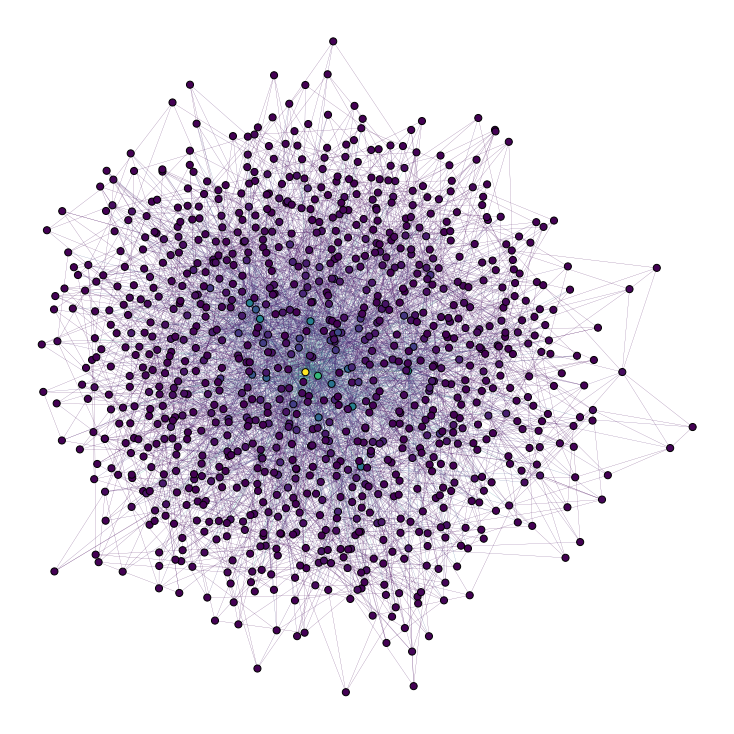

In [28]:
# set edge color based on edge weight

# matplotlib - create a larger canvas
plt.rcParams['figure.figsize'] = (10,10)

# this generated graph does not have weights, so...
# create weights for visualization demo purposes
e = VG.edges
#print(len(e))
for u,v in e:
    du = VG.degree[u]
    dv = VG.degree[v]
    VG[u][v]['weight'] = (du + dv) / 2.0 

# nonlinear scaling here to exaggerate degree
ns = df

# fix edge width
wd = 0.2
edges = VG.edges()
#colors = [VG[u][v]['color'] for u,v in edges]
weights = np.array( [VG[u][v]['weight'] for u,v in edges] )
weights = weights * 0.1
w_mn = weights.min()
w_mx = weights.max()

# specify alpha for nodes
al = 0.75

nx.draw(VG, pos=pos, node_size=50, width=0.15, edge_color=weights, node_color=df, edgecolors='black', linewidths=1)

plt.axis('off')
plt.show()


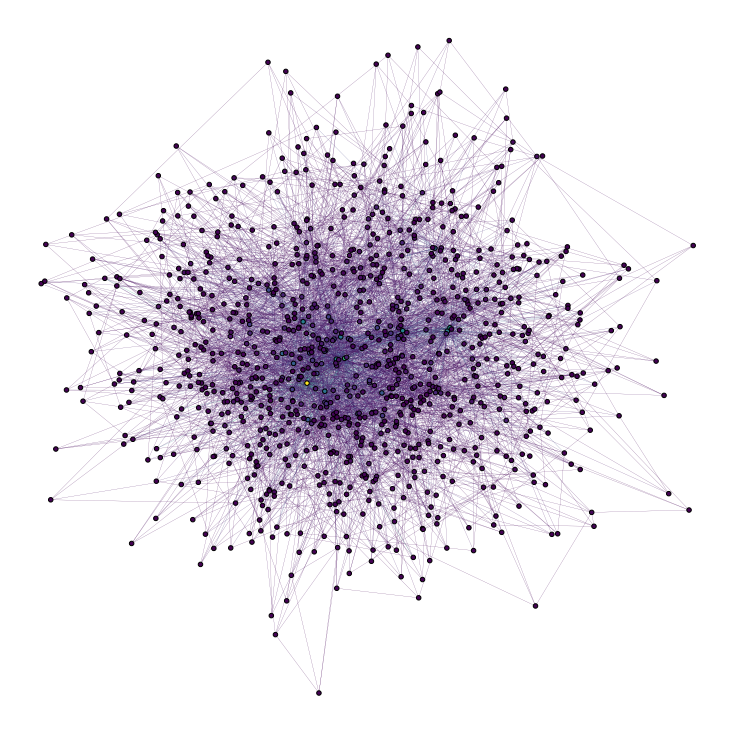

In [29]:
# Try a different layout
pos = nx.spring_layout(VG,iterations=10)
nx.draw(VG, pos=pos, node_size=20, width=0.15, edge_color=weights, node_color=df, edgecolors='black', linewidths=1)


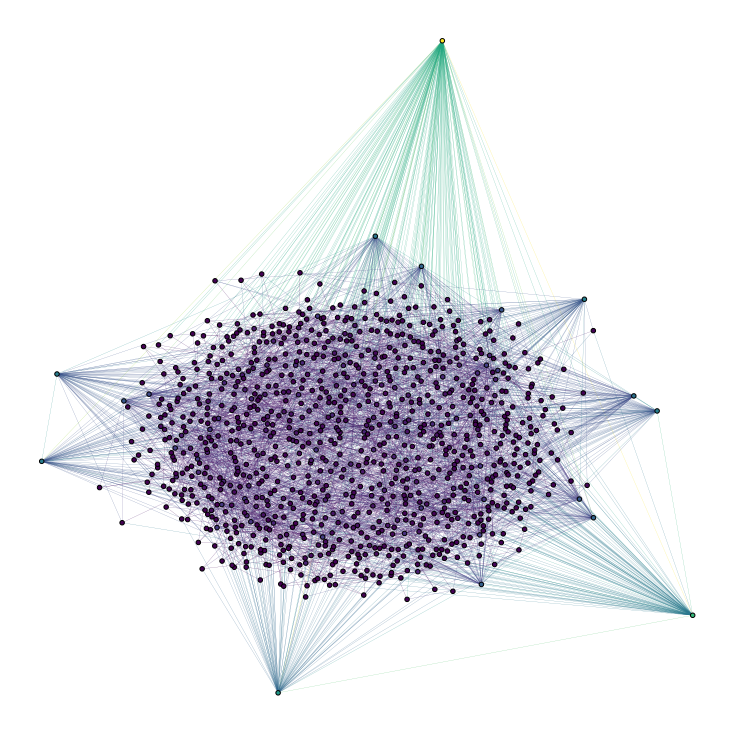

In [30]:
# Try a different layout
pos = nx.kamada_kawai_layout(VG)
nx.draw(VG, pos=pos, node_size=20, width=0.15, edge_color=weights, node_color=df, edgecolors='black', linewidths=1)


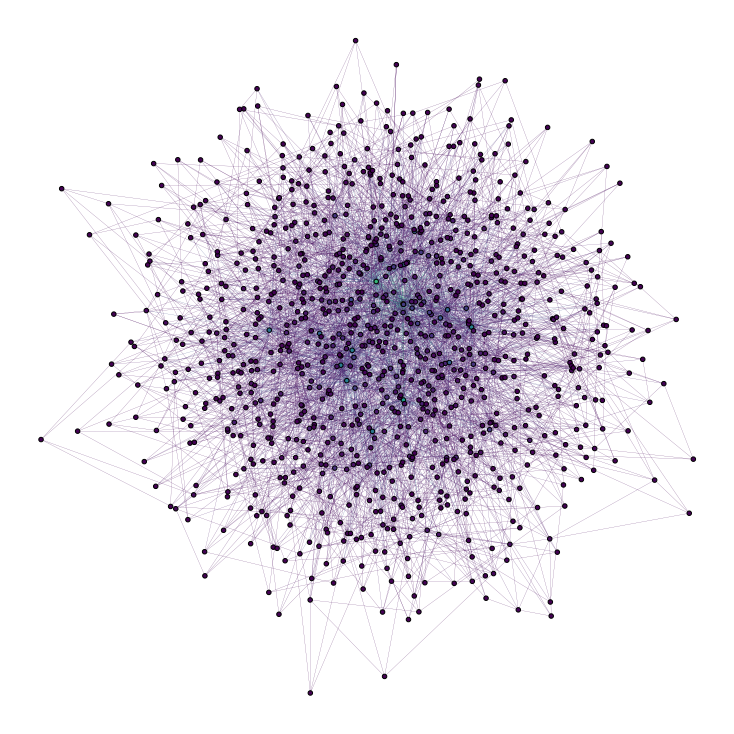

In [31]:
# Try a different layout
pos = nx.fruchterman_reingold_layout(VG,iterations=200)
nx.draw(VG, pos=pos, node_size=20, width=0.15, edge_color=weights, node_color=df, edgecolors='black', linewidths=1)

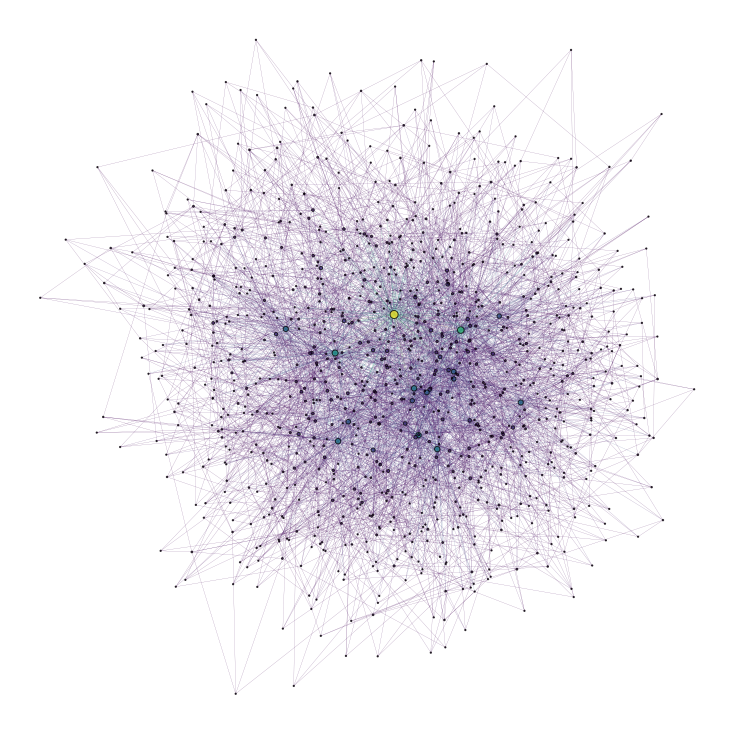

In [32]:
# Change node size base on centrality measure
pos = nx.fruchterman_reingold_layout(VG,iterations=400)
nx.draw(VG, pos=pos, node_size=df*0.1, alpha=0.75, width=0.15, edge_color=weights, node_color=df, edgecolors='black', linewidths=1)

<img src="./images/div-0.png" alt="Drawing" align="left" style="width: 800px" />

In [33]:
# Graph Level Measures in networkx
# See:https://networkx.github.io/documentation/stable/reference/functions.html
# See:https://networkx.github.io/documentation/stable/reference/algorithms/distance_measures.html

# General functions on a graph 
print('Density:', nx.density(VG))
print('Number of Nodes:', nx.number_of_nodes(VG))

# Distance Measures
print("Radius:", nx.radius(VG))
print("Diameter:", nx.diameter(VG))
print("Eccentricity:", nx.eccentricity(VG))
print("Center:", nx.center(VG))
print("Periphery:", nx.periphery(VG))

Density: 0.007965965965965965
Number of Nodes: 1000
Radius: 3
Diameter: 5
Eccentricity: {0: 3, 1: 4, 2: 4, 3: 4, 4: 4, 5: 4, 6: 4, 7: 4, 8: 4, 9: 4, 10: 4, 11: 4, 12: 4, 13: 4, 14: 4, 15: 4, 16: 4, 17: 4, 18: 4, 19: 4, 20: 4, 21: 4, 22: 4, 23: 4, 24: 4, 25: 4, 26: 4, 27: 4, 28: 4, 29: 4, 30: 4, 31: 4, 32: 4, 33: 4, 34: 4, 35: 4, 36: 4, 37: 4, 38: 4, 39: 4, 40: 4, 41: 4, 42: 4, 43: 4, 44: 4, 45: 4, 46: 4, 47: 4, 48: 4, 49: 4, 50: 4, 51: 4, 52: 4, 53: 4, 54: 4, 55: 4, 56: 4, 57: 4, 58: 4, 59: 4, 60: 4, 61: 4, 62: 4, 63: 4, 64: 4, 65: 5, 66: 4, 67: 4, 68: 4, 69: 4, 70: 4, 71: 4, 72: 4, 73: 4, 74: 4, 75: 4, 76: 4, 77: 4, 78: 5, 79: 4, 80: 4, 81: 4, 82: 4, 83: 4, 84: 4, 85: 4, 86: 4, 87: 5, 88: 4, 89: 4, 90: 4, 91: 4, 92: 4, 93: 4, 94: 4, 95: 4, 96: 4, 97: 5, 98: 4, 99: 4, 100: 4, 101: 4, 102: 4, 103: 4, 104: 4, 105: 4, 106: 5, 107: 4, 108: 4, 109: 4, 110: 5, 111: 4, 112: 4, 113: 4, 114: 4, 115: 4, 116: 4, 117: 5, 118: 4, 119: 4, 120: 4, 121: 4, 122: 5, 123: 4, 124: 4, 125: 4, 126: 4, 127: 

<img src="./images/div-0.png" alt="Drawing" align="left" style="width: 800px" />

# Algorithms

* **Many important algorithms are defined on Graphs**
    * Breadth-First Search
    * Depth-First Search
    * A* ("A-Star") Search (Heuristic driven search)
    * Minimum Spanning Tree
    * Single-Source Shortest Paths
        * Dijkstra's Algorithm
        * Bellman-Ford Algorithm
    * All-Pairs Shortest Paths
        * Floyd-Warshall Algorithm

NetworkX Link: https://networkx.github.io/documentation/networkx-2.2/reference/algorithms/shortest_paths.html
(Many variants)

<img src="./images/div-0.png" alt="Drawing" align="left" style="width: 800px" />

### Kernel Density Estimation (KDE Plots) 

* **Problems with Histograms**
    - Appearance is dependent on bin width
    - Default bin selected by visualization software may not be the best choice
    - It's difficult to show multiple distributions on the same figure
    - Density plots are an alternative that help alleviate these issues



<img src="./images/div-0.png" alt="Drawing" align="left" style="width: 800px" />

<img src="./images/kde-2.png" alt="Drawing" align="left" style="width: 700px" />

<img src="./images/div-0.png" alt="Drawing" align="left" style="width: 800px" />

<img src="./images/kde-3.png" alt="drawing" align="left" style="width: 700px" />

<img src="./images/div-0.png" alt="Drawing" align="left" style="width: 800px" />

### KDE Density Plot

<img src="./images/kde-1.png" alt="Drawing" align="left" style="width: 700px" />

<img src="./images/div-0.png" alt="Drawing" align="left" style="width: 800px" />

<img src="./images/kde-0.png" alt="Drawing" align="left" style="width: 700px" />

<img src="./images/div-0.png" alt="Drawing" align="left" style="width: 800px" />

<img src="./images/kde-math-0.png" alt="Drawing" align="left" style="width: 800px" />

See: https://mathisonian.github.io/kde/ for an online interactive demonstration of KDE

<img src="./images/div-0.png" alt="Drawing" align="left" style="width: 800px" />

In [34]:
# get the tuple of degrees [(node,deg)...]
deg_list = VG.degree
degs = [deg for nd, deg in deg_list]

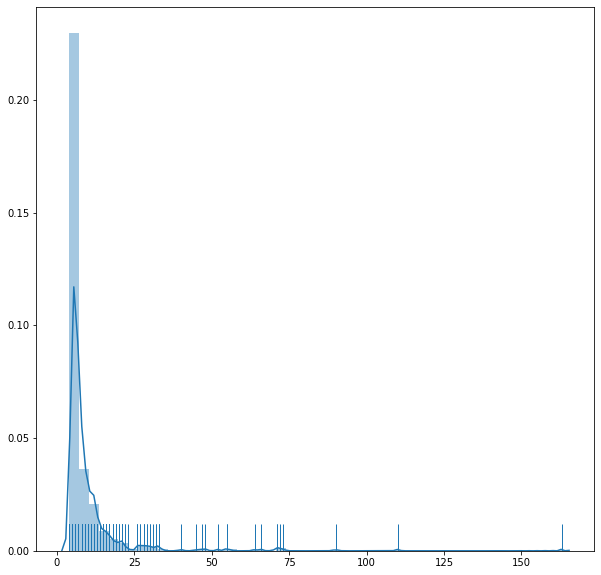

In [35]:
# First attempt use Seaborn distribution plot, with a rug plot turned on
sns.distplot(degs, rug=True)

<img src="./images/div-0.png" alt="Drawing" align="left" style="width: 800px" />

## A Quick Aside: RGB Color Images

A RGB raster image is a 2D image made up of picture elements or pixels.  
Typically, each pixel is made up of 3 color (hue) channels (red, green, blue).  
Each channel represents the the amount of that hue present in each pixel.  

See the color picker tool at: https://www.rapidtables.com/web/color/RGB_Color.html

In [36]:
# image processing example - here out data is an image
image_filename = './data/rgb-ex-2.jpg' # Windows

# Open, scale, and convert image to float
mg = img_as_float(imageio.imread(image_filename))

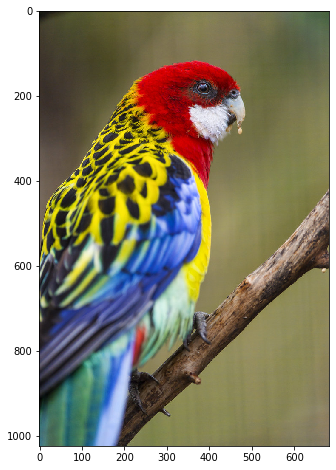

In [37]:
# Display the image we will use for the kernel density estimation analysis
plt.rcParams['figure.figsize'] = (8,8)
plt.imshow(mg)

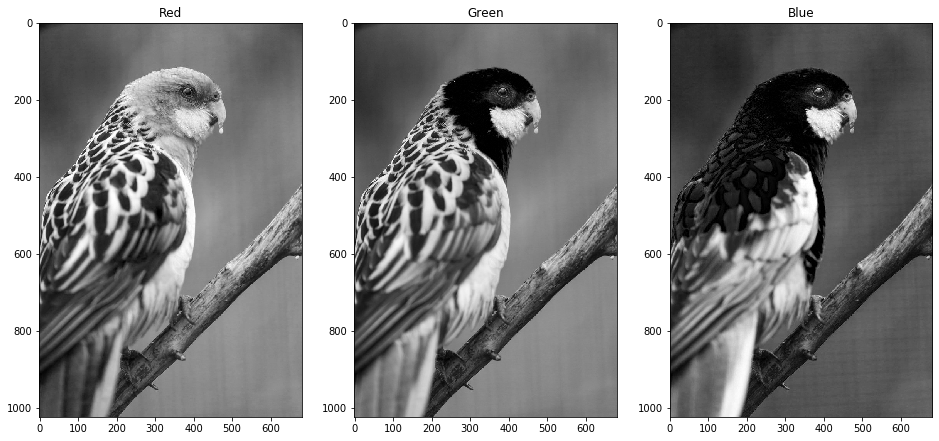

In [38]:
# numpy, break image up into it's red, green and blue channels 
red = mg[:,:,0]
green = mg[:,:,1]
blue = mg[:,:,2]

# show each channel 
fig, axes = plt.subplots(1,3, figsize=(16,16))
axes[0].imshow(red, cmap='gray')
axes[0].title.set_text('Red')
axes[1].imshow(green, cmap='gray')
axes[1].title.set_text('Green')
axes[2].imshow(blue, cmap='gray')
axes[2].title.set_text('Blue')

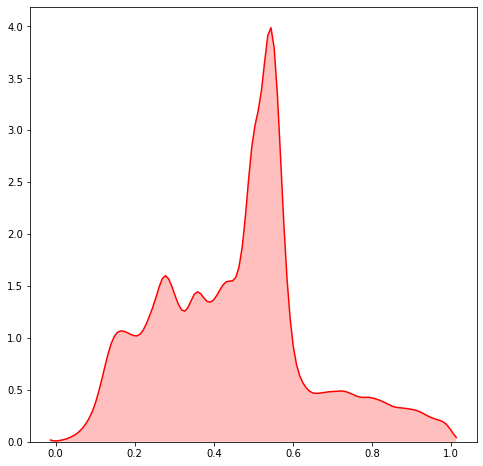

In [39]:
# Use the Seaborn KDE plot - note several options...
sns.kdeplot(red.flatten(), color='red', cut=True, shade=True)

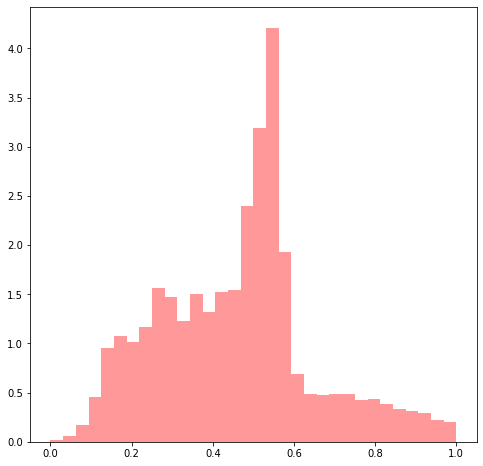

In [40]:
# Use the Seaborn distribution plot - note several options...
sns.distplot(red.flatten(), kde=False, norm_hist=True, color='red', bins=32, rug=False)

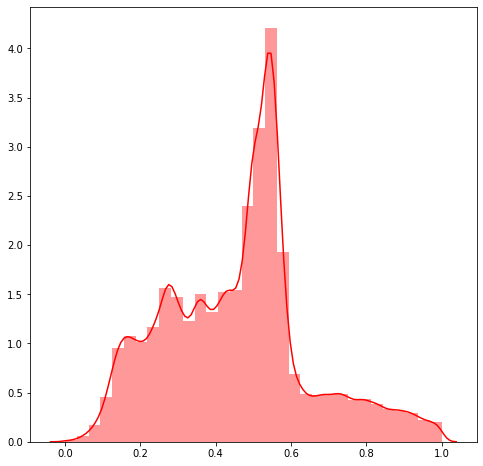

In [41]:
# Use the Seaborn distribution plot - note several options...
sns.distplot(red.flatten(), kde=True, norm_hist=False, color='red', bins=32, rug=False)

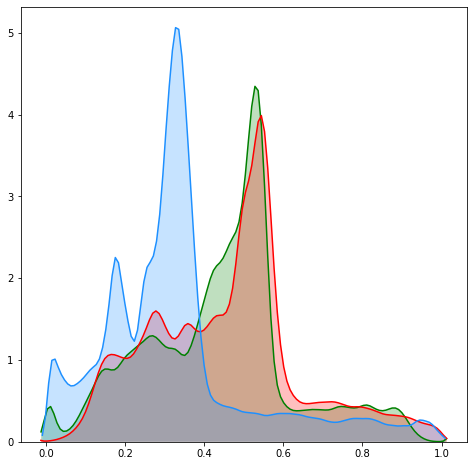

In [42]:
# One of the advantages is density plots are they are better for 
# overlaying / comparing estimated pdf's
sns.kdeplot(green.flatten(), color='green', cut=True, shade=True)
sns.kdeplot(red.flatten(), color = 'red', cut=True, shade=True)
sns.kdeplot(blue.flatten(), color = 'dodgerblue', cut=True, shade=True)

<class 'pandas.core.frame.DataFrame'>


Text(3.8, 4.5, 'setosa')

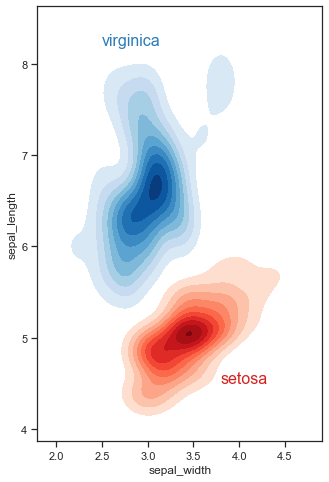

In [43]:
# Example taken from the seaborn gallery - I've added additional comments

# try different styles
sns.set(style="ticks")

# built in dataset
iris = sns.load_dataset("iris")

# Panda's dataframe
print(type(iris))

# Subset the iris dataset by species

# Special Note: there is more than one way to use Pandas to subset
# a dataframe for the exercise that follows - use the one you 
# want, but in my solution, I use the '.loc' method...

# by using Pandas query() method
setosa = iris.query("species == 'setosa'")
virginica = iris.query("species == 'virginica'")
# Or
# by using Pandas .loc method
setosa = iris.loc[ iris['species']=='setosa' ]
virginica = iris.loc[ iris['species']=='virginica' ]

# Set up the figure - note subplots, but only one plot
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]

# These are effectively "hand-placed" labels (x,y) relative to scales
ax.text(2.5, 8.2, "virginica", size=16, color=blue)
ax.text(3.8, 4.5, "setosa", size=16, color=red)

#### In Class Exercises 

* See the file networks-exercises-0.ipynb for the list of exercises - arranged from beginner to more advanced...
* See the files networks-exercises-soln-0.ipynb and airline-network-2.ipynb for solutions  